# Spline Constraints Demo
This notebook demonstrates how constraints can be applied to different splines using the `lpspline` package.


In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

from lpspline import bs, l, pwl
from lpspline.constraints import Anchor, Monotonic, Concave, Convex
from lpspline.optimizer import LpRegressor
from lpspline.penalties import Ridge

# Create a sample dataset
np.random.seed(50)
x_data = np.linspace(-5, 5, 200)
# A somewhat wavy relationship
y_data = np.sin(x_data) + np.random.normal(0, 0.2, 200)

df = pl.DataFrame({"x": x_data, "y": y_data})

def plot_fit(opt, title=""):
    opt.fit(df, df["y"])
    y_pred = opt.predict(df)
    
    plt.figure(figsize=(8, 4))
    plt.scatter(df["x"], df["y"], alpha=0.3, label="Data")
    plt.plot(df["x"], y_pred, color='red', linewidth=2, label="Fit")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


## 2. Monotonic Constraint
The `Monotonic` constraint forces a spline to be monotonically increasing (or decreasing). Here we apply it to a `BSpline`.


Unconstrained B-Spline:

✨ Model Summary ✨
Problem Status: ✅ optimal
------------------------------------------------------------------------------------------------------------------------
Spline Type          | Term         | Tag             | Constraints          | Penalties            | Params  
------------------------------------------------------------------------------------------------------------------------
🟢 BSpline           | x            | bs              | Monotonic, Anchor    | Ridge                | 22      
------------------------------------------------------------------------------------------------------------------------
📊 Total Parameters                                                                                 | 22



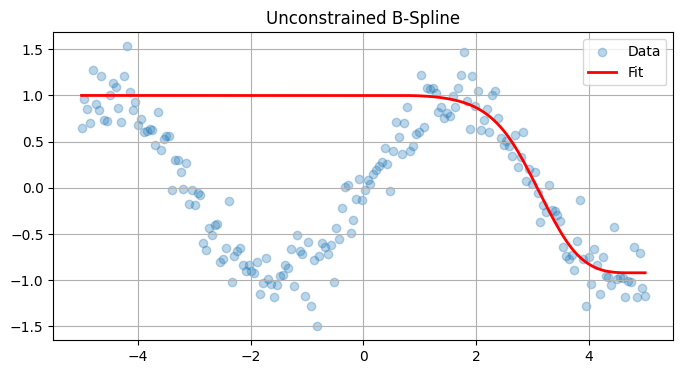

In [2]:
# Unconstrained
print("Unconstrained B-Spline:")
model = (
    +bs("x", knots=np.linspace(-10, 10, 20), degree=3, tag='bs')
    .add_constraint(Monotonic(decreasing=True))
    .add_constraint(Anchor(xy=[(0, 1)]))
    .add_penalty(Ridge(alpha=.1))
)
plot_fit(model, "Unconstrained B-Spline")

(<Figure size 500x400 with 1 Axes>, array([<Axes: xlabel='x'>], dtype=object))

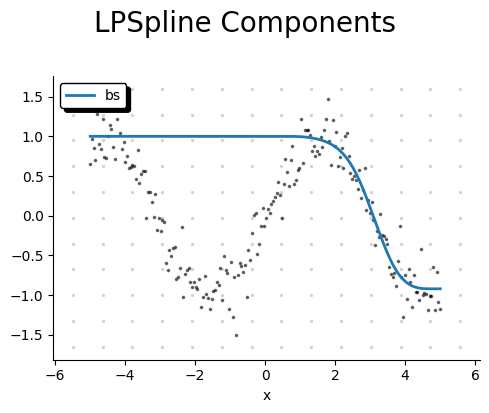

In [3]:
from lpspline.viz import splines_diagnostic
splines_diagnostic(model=model, X=df, y=df["y"])